In [1]:
x=1

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import random
import pandas as pd
from matplotlib import pyplot as plt
import os

random.seed(123)

In [3]:
rootdir = '/lustre/groups/ml01/workspace/anastasia.litinetskaya/experiments/integration/trimodal/vary_integration_coefficient/kl0.01/'

In [4]:
results = {}

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith("metrics.csv"):
            coef = float(subdir.split('/')[-1].split('-')[-1])
            name = filepath.split('/')[-1][:-12]
            df = pd.read_csv(filepath)
            df = df.set_index('Unnamed: 0')
            if name not in results:
                results[name] = {}
            results[name][coef] = df['0']['overall']

In [5]:
df = pd.DataFrame(results)
df = df.sort_index()
df

,reference_CITE-seq_query,reference_snRNA-seq_query,train,reference_ATAC-seq_query,reference_query,reference_scRNA-seq_query,reference_multiome_query
0.000000e+00,0.701085,0.641531,0.733742,0.609674,0.648664,0.653418,0.723389
1.000000e-03,0.694997,0.637421,0.721174,0.605712,0.636025,0.636817,0.709520
1.000000e-02,0.719361,0.700719,0.760042,0.630178,0.681989,0.724691,0.746204
1.000000e-01,0.703851,0.671270,0.703333,0.615085,0.657264,0.664397,0.706752
1.000000e+00,0.730822,0.674765,0.697686,0.609646,0.631900,0.642116,0.716371
1.000000e+01,0.747520,0.691739,0.750554,0.694684,0.692980,0.701892,0.747753
1.000000e+02,0.733441,0.727955,0.746974,0.727692,0.716491,0.730719,0.756916
1.000000e+03,0.738058,0.710207,0.740644,0.706910,0.714866,0.719128,0.740472
1.000000e+04,0.747717,0.743667,0.759303,0.747575,0.753552,0.759151,0.751158
1.000000e+05,0.718873,0.686336,0.689139,0.673800,0.709071,0.692607,0.712778


In [6]:
df = df[['train', 
         'reference_CITE-seq_query', 
         'reference_multiome_query', 
         'reference_scRNA-seq_query', 
         'reference_ATAC-seq_query',
         'reference_snRNA-seq_query']]

In [7]:
df = df.rename(columns={
    'reference_CITE-seq_query': 'CITE-seq mapping', 
    'reference_snRNA-seq_query': 'snRNA-seq mapping', 
    'train': 'reference building',
    'reference_ATAC-seq_query': 'ATAC-seq mapping', 
    'reference_scRNA-seq_query': 'scRNA-seq mapping', 
    'reference_multiome_query': 'multiome mapping'
})

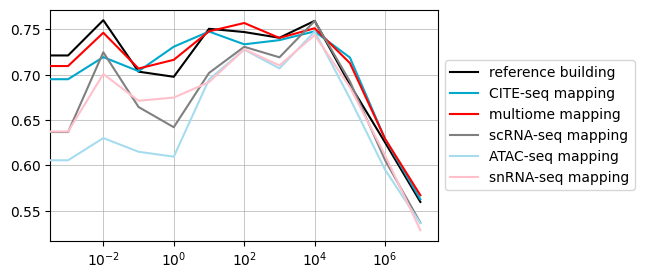

In [8]:
ax = df.plot(figsize=(5, 3), logx=True, color=["black", "#00a8cc", "red",  "gray", "#a6dcef", "#FFC0CB"], zorder=3)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax.grid(zorder=0, linewidth=0.5)
plt.savefig('figures/robustness_integration_coef.svg', bbox_inches='tight')